In [1]:
from tslearn.utils import to_time_series_dataset
import pandas as pd
import numpy as np

I:\env\envs\TSF\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
#读取数据
data_path = "../../dataset/LongYuanPower/processed/Turb1.csv"
df = pd.read_csv(data_path)
Wspd = df['Wspd'].to_numpy().reshape(-1)
print(Wspd[0:10])
Wspd[1:] = Wspd[1:] - Wspd[0:-1]
Wspd[1] = 0
print(Wspd[0:10])
train_len = int(Wspd.shape[0]*0.7)
print(train_len)

[0.   6.17 6.27 6.42 6.25 6.1  6.77 6.7  6.44 6.25]
[ 0.    0.    0.1   0.15 -0.17 -0.15  0.67 -0.07 -0.26 -0.19]
24696


In [3]:
#归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Wspd = scaler.fit_transform(np.transpose(Wspd[:train_len].reshape(1,-1),(1,0))).reshape(-1)
print(Wspd.shape)
print(Wspd)

(24696,)
[0.49173879 0.49173879 0.4956727  ... 0.48111723 0.49685287 0.53815893]


In [4]:
#随机选取
rand_index = np.random.uniform(0,train_len-21,1500)
list = []
for i in range(1500):
    index = int(rand_index[i])
    list.append(Wspd[index:index+20])
for i in range(0,train_len-20,20):
    list.append(Wspd[i:i+20])
Wspd = np.array(list)
print(Wspd.shape)

(2734, 20)


In [5]:
#到tslean的series
Wspd = to_time_series_dataset(Wspd)
print(Wspd.shape)

(2734, 20, 1)


In [6]:
#聚类
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=100, metric="dtw")
labels_gak = km.fit_predict(Wspd)

In [62]:
#从文件读取聚类信息
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=100, metric="dtw")
km = TimeSeriesKMeans.from_json("./cluster/clustering_100.json")
labels_gak = km.predict(Wspd)

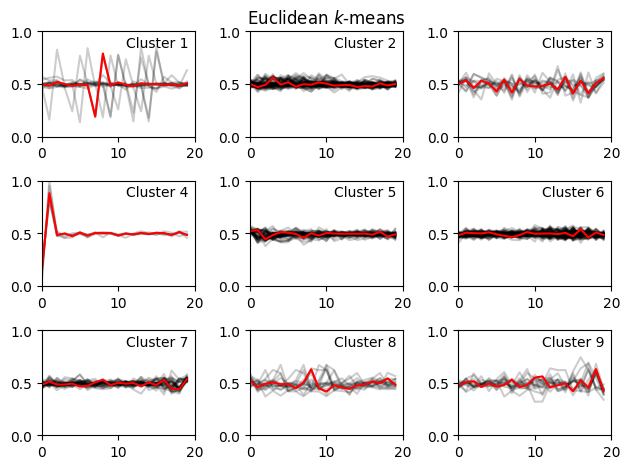

In [11]:
import matplotlib.pyplot as plt
plt.figure()
for yi in range(9):
    plt.subplot(3, 3, yi + 1)
    for xx in Wspd[labels_gak == yi+0]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi+0].ravel(), "r-")
    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.tight_layout()
plt.show()

In [12]:
np.save('./cluster/clustering_100.npz',labels_gak)
km.to_json("./cluster/clustering_100.json")

In [13]:
unique,counts=np.unique(labels_gak,return_counts=True)
print(dict(zip(unique, counts)))
print(max(counts))

{0: 14, 1: 73, 2: 13, 3: 5, 4: 51, 5: 83, 6: 33, 7: 15, 8: 14, 9: 18, 10: 6, 11: 34, 12: 22, 13: 6, 14: 15, 15: 59, 16: 4, 17: 17, 18: 25, 19: 25, 20: 39, 21: 3, 22: 2, 23: 6, 24: 109, 25: 19, 26: 2, 27: 62, 28: 49, 29: 36, 30: 4, 31: 8, 32: 17, 33: 40, 34: 8, 35: 108, 36: 4, 37: 54, 38: 78, 39: 116, 40: 11, 41: 93, 42: 15, 43: 25, 44: 9, 45: 8, 46: 5, 47: 11, 48: 7, 49: 16, 50: 3, 51: 7, 52: 22, 53: 2, 54: 1, 55: 189, 56: 13, 57: 18, 58: 35, 59: 16, 60: 16, 61: 53, 62: 45, 63: 8, 64: 5, 65: 20, 66: 10, 67: 72, 68: 66, 69: 94, 70: 23, 71: 1, 72: 2, 73: 32, 74: 10, 75: 10, 76: 61, 77: 52, 78: 26, 79: 41, 80: 33, 81: 7, 82: 12, 83: 2, 84: 33, 85: 2, 86: 16, 87: 3, 88: 41, 89: 28, 90: 12, 91: 2, 92: 40, 93: 18, 94: 1, 95: 22, 96: 7, 97: 3, 98: 2, 99: 1}
189


In [14]:
df = pd.DataFrame(labels_gak)
print(df)
df.to_csv("./cluster/clustering_100.csv",index=False)

       0
0     59
1     58
2     77
3     56
4     24
...   ..
2729  95
2730  67
2731  92
2732   5
2733   5

[2734 rows x 1 columns]


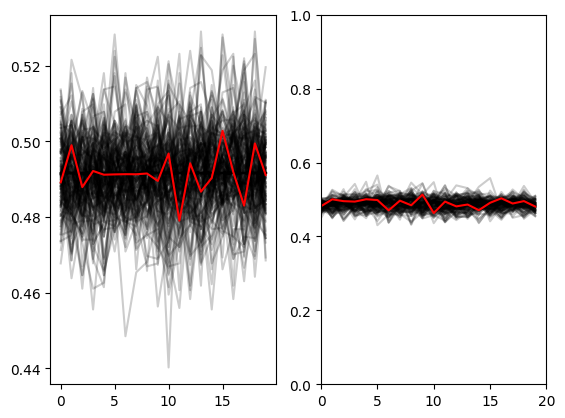

In [19]:
plt.figure()

plt.subplot(1, 2, 1)
for xx in Wspd[labels_gak == 55]:
    plt.plot(xx.ravel(), "k-", alpha=.2)
plt.plot(km.cluster_centers_[55].ravel(), "r-")
plt.subplot(1, 2, 2)
for xx in Wspd[labels_gak == 39]:
    plt.plot(xx.ravel(), "k-", alpha=.2)
plt.plot(km.cluster_centers_[39].ravel(), "r-")
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.show()

(1, 20, 1)
[93]


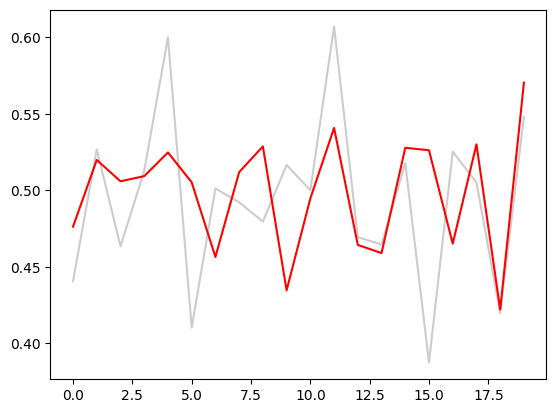

In [81]:
#predict one
select = Wspd[258].ravel()
select = to_time_series_dataset(select)
print(select.shape)
label = km.predict(select)
print(label)
plt.figure()
plt.plot(select.ravel(), "k-", alpha=.2)
plt.plot(km.cluster_centers_[label].ravel(), "r-")
plt.show()

In [6]:
#聚类euclidean
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=100, metric="euclidean")
labels_gak = km.fit_predict(Wspd)
np.save('./cluster/clustering_100_euclidean.npz',labels_gak)
km.to_json("./cluster/clustering_100_euclidean.json")
unique,counts=np.unique(labels_gak,return_counts=True)
print(dict(zip(unique, counts)))
print(max(counts))
df = pd.DataFrame(labels_gak)
df.to_csv("./cluster/clustering_100_euclidean.csv",index=False)

{0: 45, 1: 36, 2: 24, 3: 33, 4: 116, 5: 3, 6: 18, 7: 5, 8: 37, 9: 73, 10: 92, 11: 4, 12: 5, 13: 396, 14: 1, 15: 3, 16: 3, 17: 40, 18: 32, 19: 1, 20: 4, 21: 3, 22: 39, 23: 68, 24: 1, 25: 85, 26: 4, 27: 23, 28: 24, 29: 66, 30: 21, 31: 3, 32: 31, 33: 109, 34: 26, 35: 13, 36: 1, 37: 51, 38: 13, 39: 1, 40: 54, 41: 1, 42: 2, 43: 29, 44: 1, 45: 8, 46: 9, 47: 2, 48: 30, 49: 4, 50: 34, 51: 4, 52: 4, 53: 31, 54: 3, 55: 10, 56: 26, 57: 34, 58: 1, 59: 1, 60: 122, 61: 3, 62: 2, 63: 2, 64: 1, 65: 2, 66: 14, 67: 51, 68: 3, 69: 2, 70: 52, 71: 2, 72: 2, 73: 14, 74: 170, 75: 11, 76: 2, 77: 54, 78: 57, 79: 1, 80: 15, 81: 1, 82: 11, 83: 32, 84: 45, 85: 26, 86: 5, 87: 2, 88: 1, 89: 56, 90: 6, 91: 3, 92: 1, 93: 1, 94: 1, 95: 1, 96: 2, 97: 53, 98: 6, 99: 58}
396


In [7]:
#聚类softdtw
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=100, metric="softdtw")
labels_gak = km.fit_predict(Wspd)
np.save('./cluster/clustering_100_softdtw.npz',labels_gak)
km.to_json("./cluster/clustering_100_softdtw.json")
unique,counts=np.unique(labels_gak,return_counts=True)
print(dict(zip(unique, counts)))
print(max(counts))
df = pd.DataFrame(labels_gak)
df.to_csv("./cluster/clustering_100_softdtw.csv",index=False)

{7: 818, 8: 1, 10: 1, 15: 45, 18: 3, 20: 73, 23: 3, 25: 136, 29: 6, 31: 1, 34: 1, 41: 1, 43: 60, 44: 1, 47: 14, 49: 2, 50: 58, 51: 16, 52: 5, 53: 18, 57: 11, 58: 33, 67: 8, 75: 68, 78: 3, 81: 2, 83: 1164, 84: 5, 86: 10, 92: 61, 94: 41, 98: 65}
1164


In [8]:
#聚类 kshape
from tslearn.clustering import KShape
km = KShape(n_clusters=100)
labels_gak = km.fit_predict(Wspd)
np.save('./cluster/clustering_100_kshape.npz',labels_gak)
km.to_json("./cluster/clustering_100_kshape.json")
unique,counts=np.unique(labels_gak,return_counts=True)
print(dict(zip(unique, counts)))
print(max(counts))
df = pd.DataFrame(labels_gak)
df.to_csv("./cluster/clustering_100_kshape.csv",index=False)

{0: 8, 1: 37, 2: 5, 3: 9, 4: 8, 5: 3, 6: 44, 7: 14, 8: 41, 9: 9, 10: 58, 11: 18, 12: 24, 13: 6, 14: 13, 15: 13, 16: 52, 17: 7, 18: 15, 19: 18, 20: 220, 21: 62, 22: 2, 23: 90, 24: 186, 25: 11, 26: 8, 27: 39, 28: 42, 29: 24, 30: 13, 31: 52, 32: 15, 33: 24, 34: 3, 35: 5, 36: 27, 37: 12, 38: 14, 39: 3, 40: 19, 41: 23, 42: 10, 43: 20, 44: 5, 45: 21, 46: 18, 47: 34, 48: 24, 49: 37, 50: 5, 51: 24, 52: 4, 53: 301, 54: 6, 56: 13, 57: 15, 58: 16, 59: 85, 60: 10, 61: 6, 62: 25, 63: 6, 64: 106, 65: 2, 66: 7, 67: 6, 68: 13, 69: 2, 70: 24, 71: 8, 72: 8, 73: 12, 74: 8, 75: 15, 76: 21, 77: 2, 78: 97, 79: 44, 80: 26, 81: 13, 82: 29, 83: 4, 84: 3, 85: 4, 87: 59, 88: 68, 89: 19, 90: 12, 91: 5, 93: 22, 94: 37, 95: 4, 96: 36, 97: 25, 98: 3, 99: 9}
301


In [9]:
#聚类 KernelKMeans
from tslearn.clustering import KernelKMeans
km = KernelKMeans(n_clusters=100)
labels_gak = km.fit_predict(Wspd)
np.save('./cluster/clustering_100_KernelKMeans.npz',labels_gak)
km.to_json("./cluster/clustering_100_KernelKMeans.json")
unique,counts=np.unique(labels_gak,return_counts=True)
print(dict(zip(unique, counts)))
print(max(counts))
df = pd.DataFrame(labels_gak)
df.to_csv("./cluster/clustering_100_KernelKMeans.csv",index=False)

{4: 3, 6: 15, 7: 464, 8: 11, 13: 50, 14: 55, 15: 10, 17: 321, 18: 7, 21: 3, 25: 2, 26: 179, 27: 18, 29: 5, 33: 856, 35: 5, 36: 2, 43: 205, 45: 1, 47: 26, 53: 7, 54: 4, 58: 1, 59: 12, 61: 18, 63: 15, 64: 2, 65: 5, 71: 8, 73: 35, 74: 19, 77: 6, 78: 1, 81: 11, 84: 3, 86: 125, 87: 1, 88: 44, 89: 1, 94: 12, 96: 9, 98: 153, 99: 4}
856


In [10]:
#从文件读取聚类信息
from tslearn.clustering import KShape
km = TimeSeriesKMeans(n_clusters=100)
km = TimeSeriesKMeans.from_json("./cluster/clustering_100_kshape.json")
labels_gak = km.predict(Wspd)

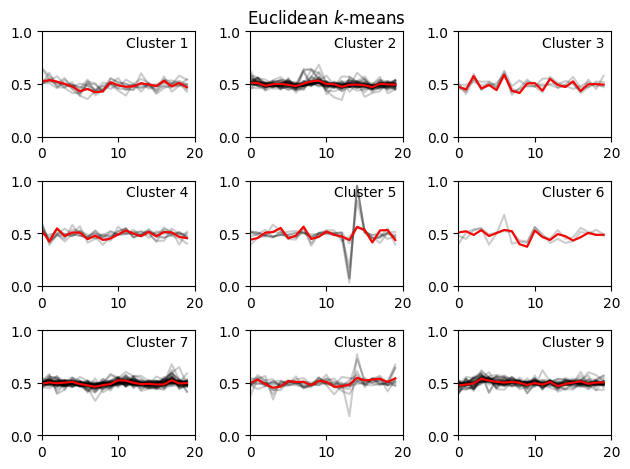

In [11]:
import matplotlib.pyplot as plt
plt.figure()
for yi in range(9):
    plt.subplot(3, 3, yi + 1)
    for xx in Wspd[labels_gak == yi+0]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi+0].ravel(), "r-")
    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.tight_layout()
plt.show()

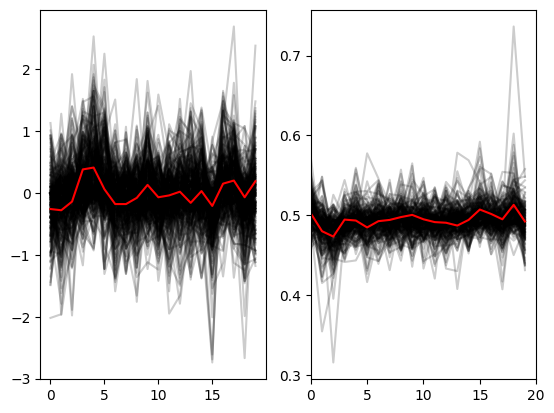

In [16]:
plt.figure()


plt.subplot(1, 2, 1)
for xx in Wspd[labels_gak == 53]:
    plt.plot(scaler.inverse_transform(xx), "k-", alpha=.2)
plt.plot(scaler.inverse_transform(km.cluster_centers_[53]), "r-")
plt.subplot(1, 2, 2)
for xx in Wspd[labels_gak == 24]:
    plt.plot(xx.ravel(), "k-", alpha=.2)
plt.plot(km.cluster_centers_[24].ravel(), "r-")
plt.xlim(0, 20)
plt.show()

In [19]:
data_path = "../../dataset/LongYuanPower/processed/Turb1.csv"
df = pd.read_csv(data_path)
Wspd = df['Wspd'].to_numpy().reshape(-1)
print(Wspd[0:10])
Wspd[1:] = Wspd[1:] - Wspd[0:-1]
Wspd[1] = 0
print(Wspd[0:10])
print(Wspd.__len__())

[0.   6.17 6.27 6.42 6.25 6.1  6.77 6.7  6.44 6.25]
[ 0.    0.    0.1   0.15 -0.17 -0.15  0.67 -0.07 -0.26 -0.19]
35280


In [73]:
from sklearn.preprocessing import OneHotEncoder
list = []
enc = OneHotEncoder()
for i in range(0,Wspd.__len__()-20,10):
    select = to_time_series_dataset(Wspd[i:i+20])
    label = km.predict(select)
    list.append(label.reshape(-1))
list = np.array(list).reshape(-1,1)
one_hots = enc.fit_transform(list).toarray()

In [75]:
df = pd.DataFrame(one_hots)
print(df)
df.to_csv("./cluster/clustered_100_kshape.csv",index=False)

       0    1    2    3    4    5    6    7    8    9   ...   60   61   62  \
0     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3521  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3522  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3523  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3524  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3525  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       63   64   65   66   67   68   69  
0     0.0  0.0  0.0  

In [88]:
predict = np.load('../../results/nodate_clusterings_LightTS_custom_withoudate_ftM_sl50_ll25_pl5_dm512_nh12_el10_dl10_df512_expand2_dc4_fc1_ebtimeF_dtTrue_test_0/pred.npy').reshape(-1,70)
print(predict.shape)
true = np.load('../../results/nodate_clusterings_LightTS_custom_withoudate_ftM_sl50_ll25_pl5_dm512_nh12_el10_dl10_df512_expand2_dc4_fc1_ebtimeF_dtTrue_test_0/true.npy').reshape(-1,70)
print(true.shape)
print(true[0].max())

(3200, 70)
(3200, 70)
1.0


In [94]:
pred_cols = np.argmax(predict,axis=1)
print(pred_cols.shape)
true_cols = np.argmax(true,axis=1)
print(true_cols.shape)

(3200,)
(3200,)


In [95]:
print(pred_cols[:10])
print(true_cols[0:10])

[59  3 64 54 26 13  3  3 65  7]
[ 3 69  0 26  3 69  0 26  3  3]
